In [183]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apartment-rental-market-in-colombo/Dataset (1).csv


# **Understanding the Dataset**

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [185]:
file_path = "/kaggle/input/apartment-rental-market-in-colombo/Dataset (1).csv"
df = pd.read_csv(file_path)

In [186]:
df.shape


(252, 9)

In [187]:
df.columns

Index(['ID', 'Size_in_Sqft', 'Bedrooms', 'Bathrooms',
       'Distance_to_City_Center', 'Neighborhood', 'Furnished', 'Building_Type',
       'Rental_Price'],
      dtype='object')

In [188]:
df.dtypes


ID                           int64
Size_in_Sqft                 int64
Bedrooms                    object
Bathrooms                    int64
Distance_to_City_Center    float64
Neighborhood                object
Furnished                   object
Building_Type               object
Rental_Price               float64
dtype: object

In [189]:
df.isnull().sum()

ID                         0
Size_in_Sqft               0
Bedrooms                   0
Bathrooms                  0
Distance_to_City_Center    0
Neighborhood               0
Furnished                  0
Building_Type              0
Rental_Price               0
dtype: int64

In [190]:
df.describe()

,ID,Size_in_Sqft,Bathrooms,Distance_to_City_Center,Rental_Price
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.511905,798.309524,1.257937,6.552698,4073.806084
std,72.223286,303.128836,0.438370,3.423793,2051.348014
min,1.000000,301.000000,1.000000,0.570000,804.814268
25%,63.750000,559.000000,1.000000,3.460000,2409.952761
50%,125.500000,800.000000,1.000000,7.020000,3938.417295
75%,187.250000,1020.500000,2.000000,9.610000,5245.943807
max,250.000000,1497.000000,2.000000,11.980000,13179.276580


# **Data Cleaning**

In [191]:
df.Neighborhood.unique()

array(['Uptown', 'Suburbs', 'Downtown', 'uptown', 'Midtown', 'suburbs'],
      dtype=object)

In [192]:
df.Neighborhood = df.Neighborhood.replace("uptown", "Uptown")
df.Neighborhood = df.Neighborhood.replace("suburbs", "Suburbs")

In [193]:
df.Furnished.unique()

array(['Furnished', 'Unfurnished', 'unfurnished', 'furnished'],
      dtype=object)

In [194]:
df.Furnished = df.Furnished.replace("unfurnished", "Unfurnished")
df.Furnished = df.Furnished.replace("furnished", "Furnished")

In [195]:
df.Building_Type.unique()

array(['Apartment', 'Condo', 'Studio', 'apartment', 'condo'], dtype=object)

In [196]:
df.Building_Type = df.Building_Type.replace("apartment", "Apartment")
df.Building_Type = df.Building_Type.replace("condo", "Condo")

In [197]:
df = df.drop_duplicates()

In [198]:
df['Bedrooms'].value_counts()

Bedrooms
1    91
0    70
2    48
3    34
4     5
O     2
Name: count, dtype: int64

In [199]:
df.Bedrooms = df.Bedrooms.replace("O", "-1")

In [200]:
df.Bedrooms = pd.to_numeric(df['Bedrooms'])

In [201]:
df.dtypes

ID                           int64
Size_in_Sqft                 int64
Bedrooms                     int64
Bathrooms                    int64
Distance_to_City_Center    float64
Neighborhood                object
Furnished                   object
Building_Type               object
Rental_Price               float64
dtype: object

# **Visualization**

Text(0.5, 0, 'Price')

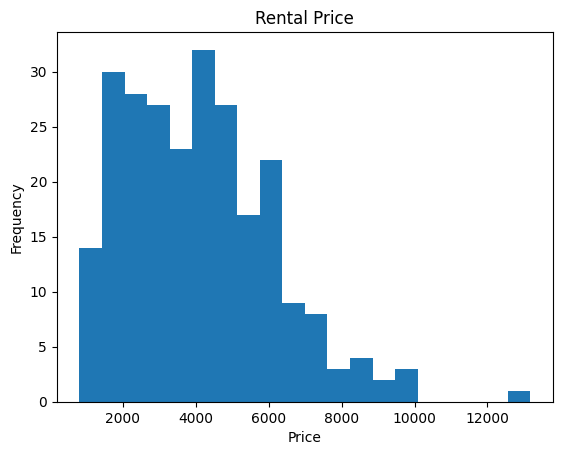

In [202]:
ax = df['Rental_Price'].plot(kind='hist',
                          bins=20,
                          title='Rental Price')
ax.set_xlabel('Price')

Text(0.5, 0, 'Rental Price')

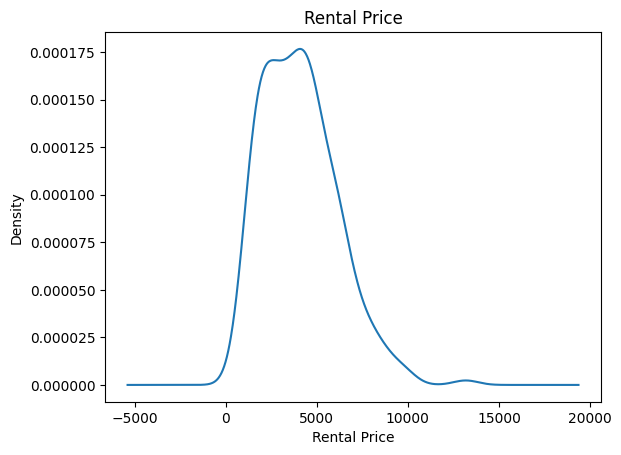

In [203]:
ax = df['Rental_Price'].plot(kind='kde',
                          title='Rental Price')
ax.set_xlabel('Rental Price')

In [204]:
df.columns

Index(['ID', 'Size_in_Sqft', 'Bedrooms', 'Bathrooms',
       'Distance_to_City_Center', 'Neighborhood', 'Furnished', 'Building_Type',
       'Rental_Price'],
      dtype='object')

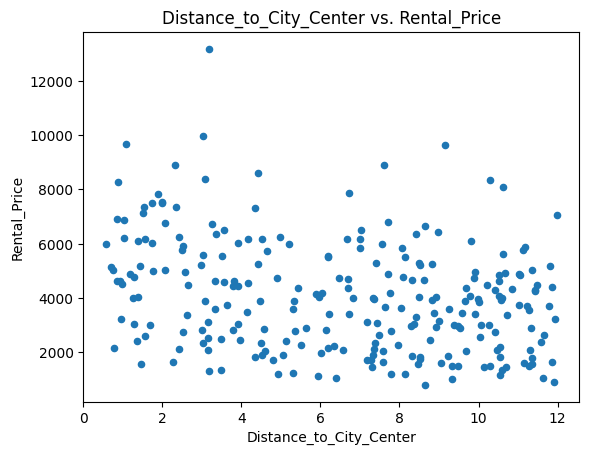

In [205]:
df.plot(kind='scatter',
        x='Distance_to_City_Center',
        y='Rental_Price',
        title='Distance_to_City_Center vs. Rental_Price')
plt.show()

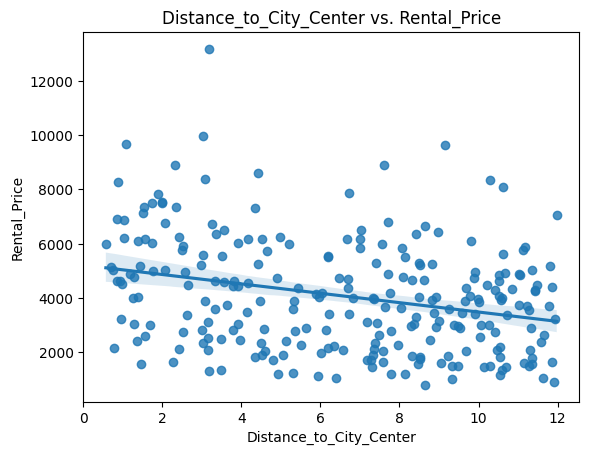

In [206]:
ax = sns.regplot(x='Distance_to_City_Center',
                y='Rental_Price',
                data=df)
ax.set_title('Distance_to_City_Center vs. Rental_Price')
plt.show()

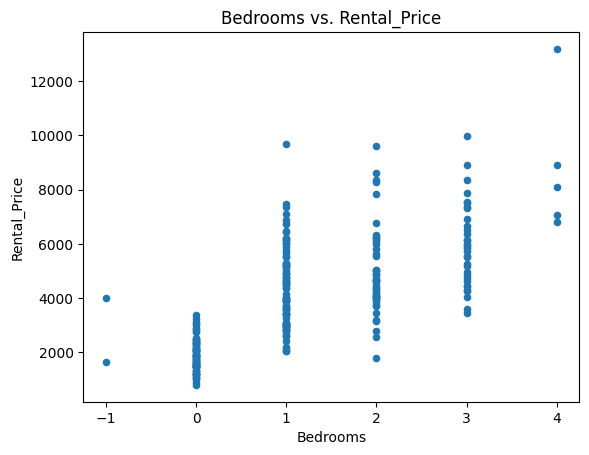

In [207]:
df.plot(kind='scatter',
        x='Bedrooms',
        y='Rental_Price',
        title='Bedrooms vs. Rental_Price')
plt.show()

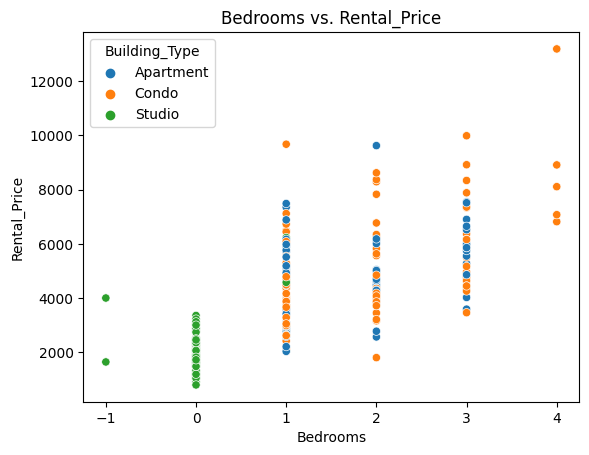

In [208]:
ax = sns.scatterplot(x='Bedrooms',
                y='Rental_Price',
                hue='Building_Type',
                data=df)
ax.set_title('Bedrooms vs. Rental_Price')
plt.show()


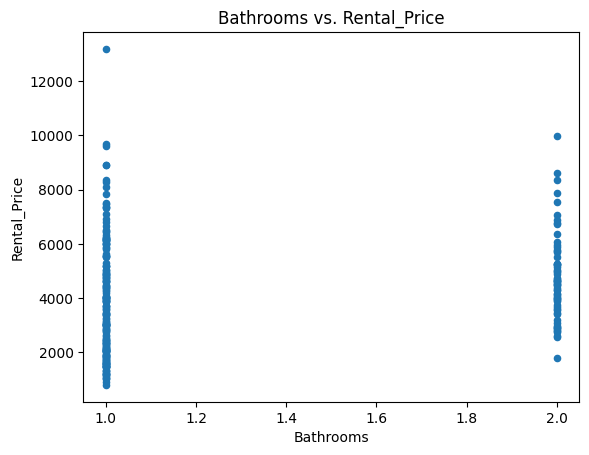

In [209]:
df.plot(kind='scatter',
        x='Bathrooms',
        y='Rental_Price',
        title='Bathrooms vs. Rental_Price')
plt.show()

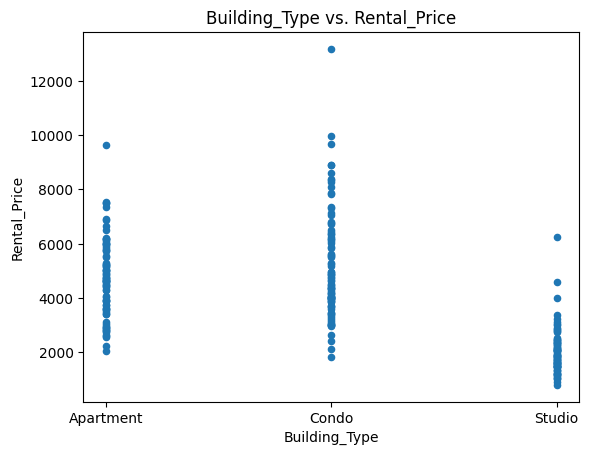

In [210]:
df.plot(kind='scatter',
        x='Building_Type',
        y='Rental_Price',
        title='Building_Type vs. Rental_Price')
plt.show()

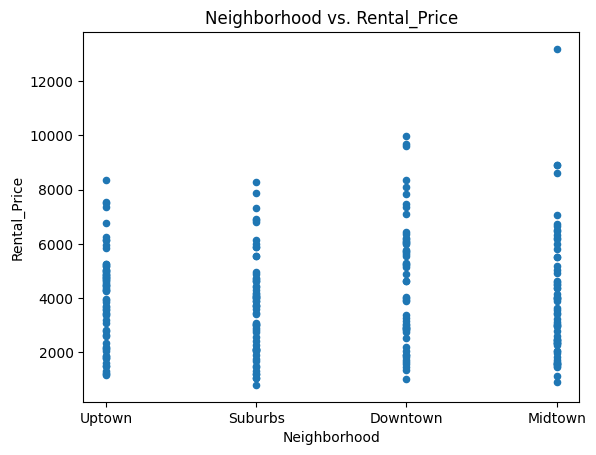

In [211]:
df.plot(kind='scatter',
        x='Neighborhood',
        y='Rental_Price',
        title='Neighborhood vs. Rental_Price')
plt.show()

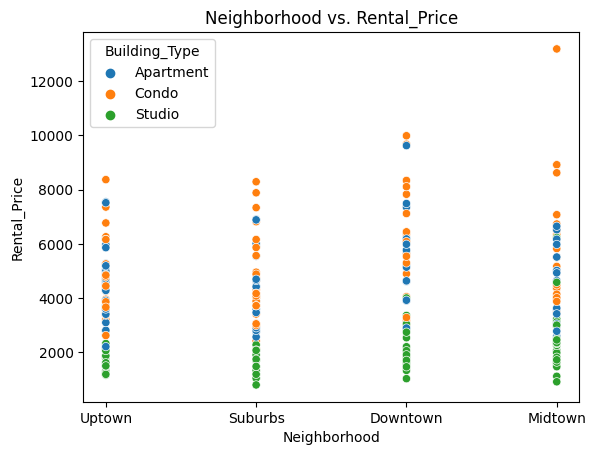

In [212]:
ax = sns.scatterplot(x='Neighborhood',
                y='Rental_Price',
                hue='Building_Type',
                data=df)
ax.set_title('Neighborhood vs. Rental_Price')
plt.show()

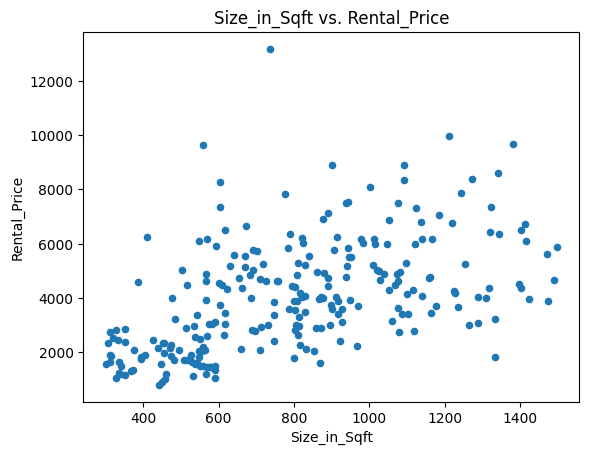

In [213]:
df.plot(kind='scatter',
        x='Size_in_Sqft',
        y='Rental_Price',
        title='Size_in_Sqft vs. Rental_Price')
plt.show()

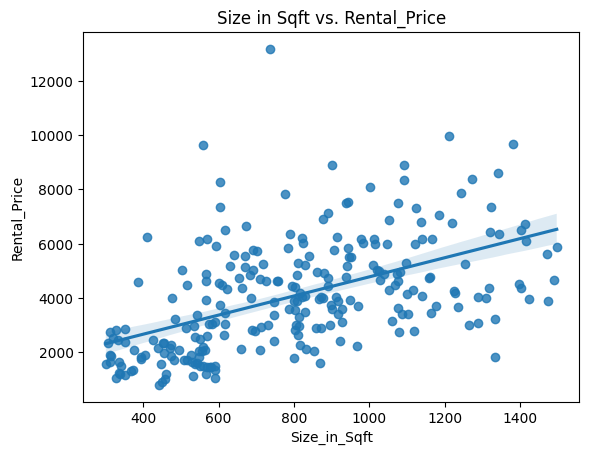

In [214]:
ax = sns.regplot(x='Size_in_Sqft',
                y='Rental_Price',
                data=df)
ax.set_title('Size in Sqft vs. Rental_Price')
plt.show()

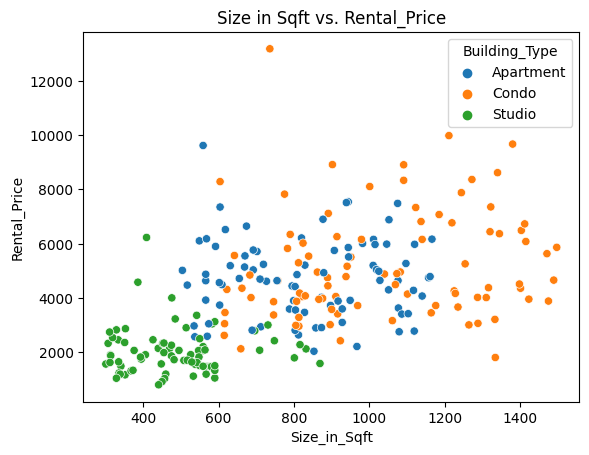

In [215]:
ax = sns.scatterplot(x='Size_in_Sqft',
                y='Rental_Price',
                hue='Building_Type',
                data=df)
ax.set_title('Size in Sqft vs. Rental_Price')
plt.show()

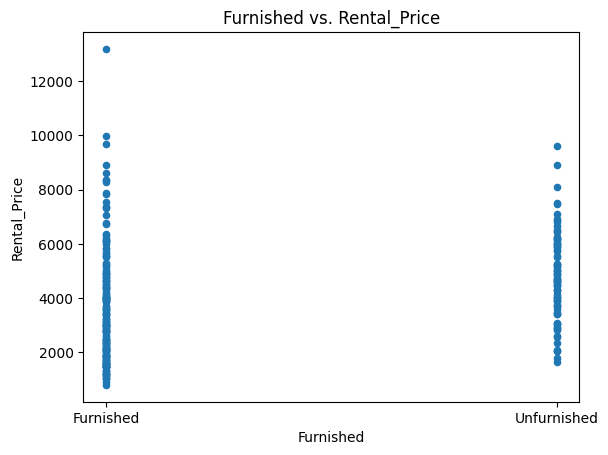

In [216]:
df.plot(kind='scatter',
        x='Furnished',
        y='Rental_Price',
        title='Furnished vs. Rental_Price')
plt.show()

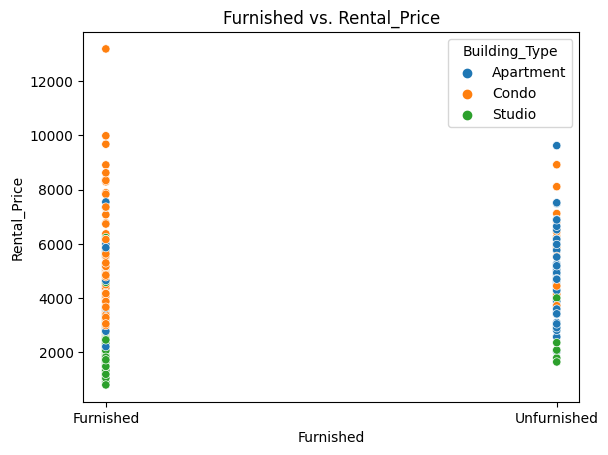

In [217]:
ax = sns.scatterplot(x='Furnished',
                y='Rental_Price',
                hue='Building_Type',
                data=df)
ax.set_title('Furnished vs. Rental_Price')
plt.show()

<Axes: >

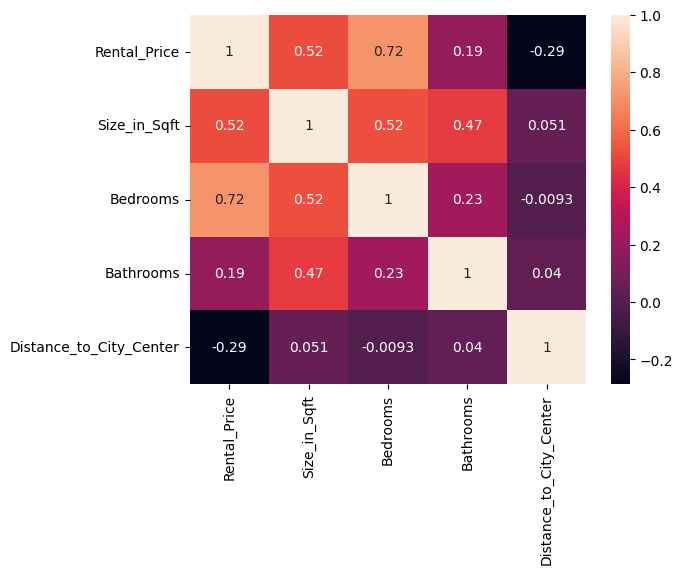

In [218]:
df_corr = df[['Rental_Price','Size_in_Sqft',
    'Bedrooms','Bathrooms','Distance_to_City_Center']].dropna().corr()
sns.heatmap(df_corr, annot=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

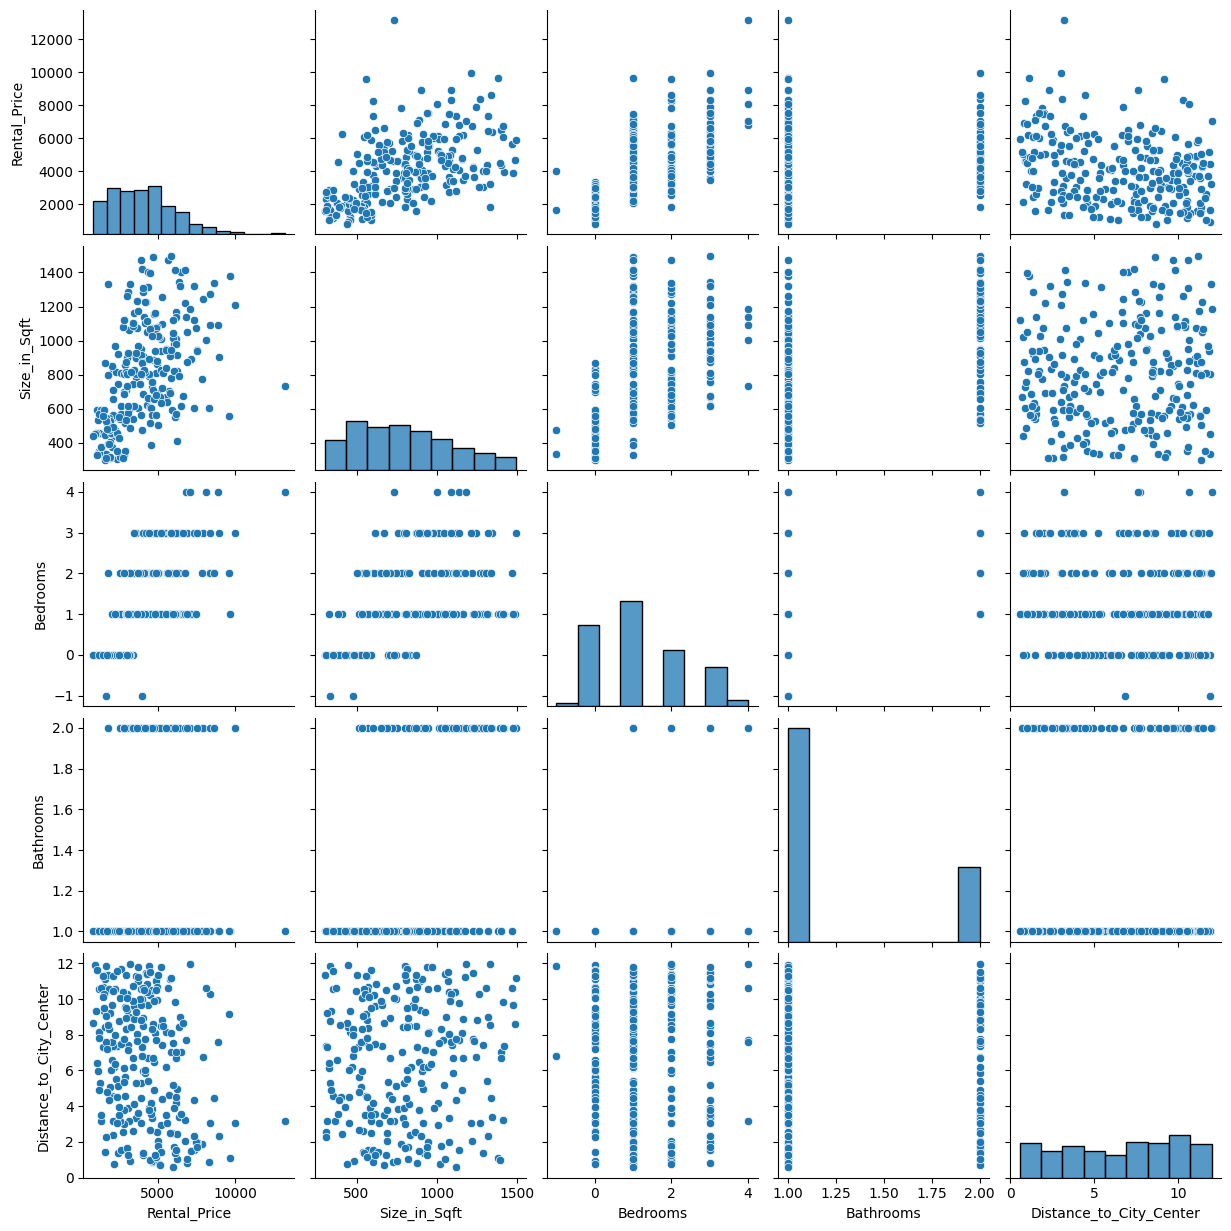

In [219]:
sns.pairplot(df,
             vars=['Rental_Price','Size_in_Sqft',
    'Bedrooms','Bathrooms','Distance_to_City_Center'])
plt.show()

In [220]:
new_df = df
new_df.columns
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_and_add(df, column):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = one_hot_encoder.fit_transform(df[[column]])
    encoded_columns = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out([column]))
    encoded_columns.index = df.index
    df = pd.concat([df, encoded_columns], axis=1)
    df = df.drop(columns=[column])
    return df

columns_to_encode = ['Neighborhood', 'Furnished', 'Building_Type']
for col in columns_to_encode:
    new_df = one_hot_encode_and_add(new_df, col)



In [221]:
new_df.dtypes

ID                           int64
Size_in_Sqft                 int64
Bedrooms                     int64
Bathrooms                    int64
Distance_to_City_Center    float64
Rental_Price               float64
Neighborhood_Downtown      float64
Neighborhood_Midtown       float64
Neighborhood_Suburbs       float64
Neighborhood_Uptown        float64
Furnished_Furnished        float64
Furnished_Unfurnished      float64
Building_Type_Apartment    float64
Building_Type_Condo        float64
Building_Type_Studio       float64
dtype: object

In [222]:
new_df.columns


Index(['ID', 'Size_in_Sqft', 'Bedrooms', 'Bathrooms',
       'Distance_to_City_Center', 'Rental_Price', 'Neighborhood_Downtown',
       'Neighborhood_Midtown', 'Neighborhood_Suburbs', 'Neighborhood_Uptown',
       'Furnished_Furnished', 'Furnished_Unfurnished',
       'Building_Type_Apartment', 'Building_Type_Condo',
       'Building_Type_Studio'],
      dtype='object')

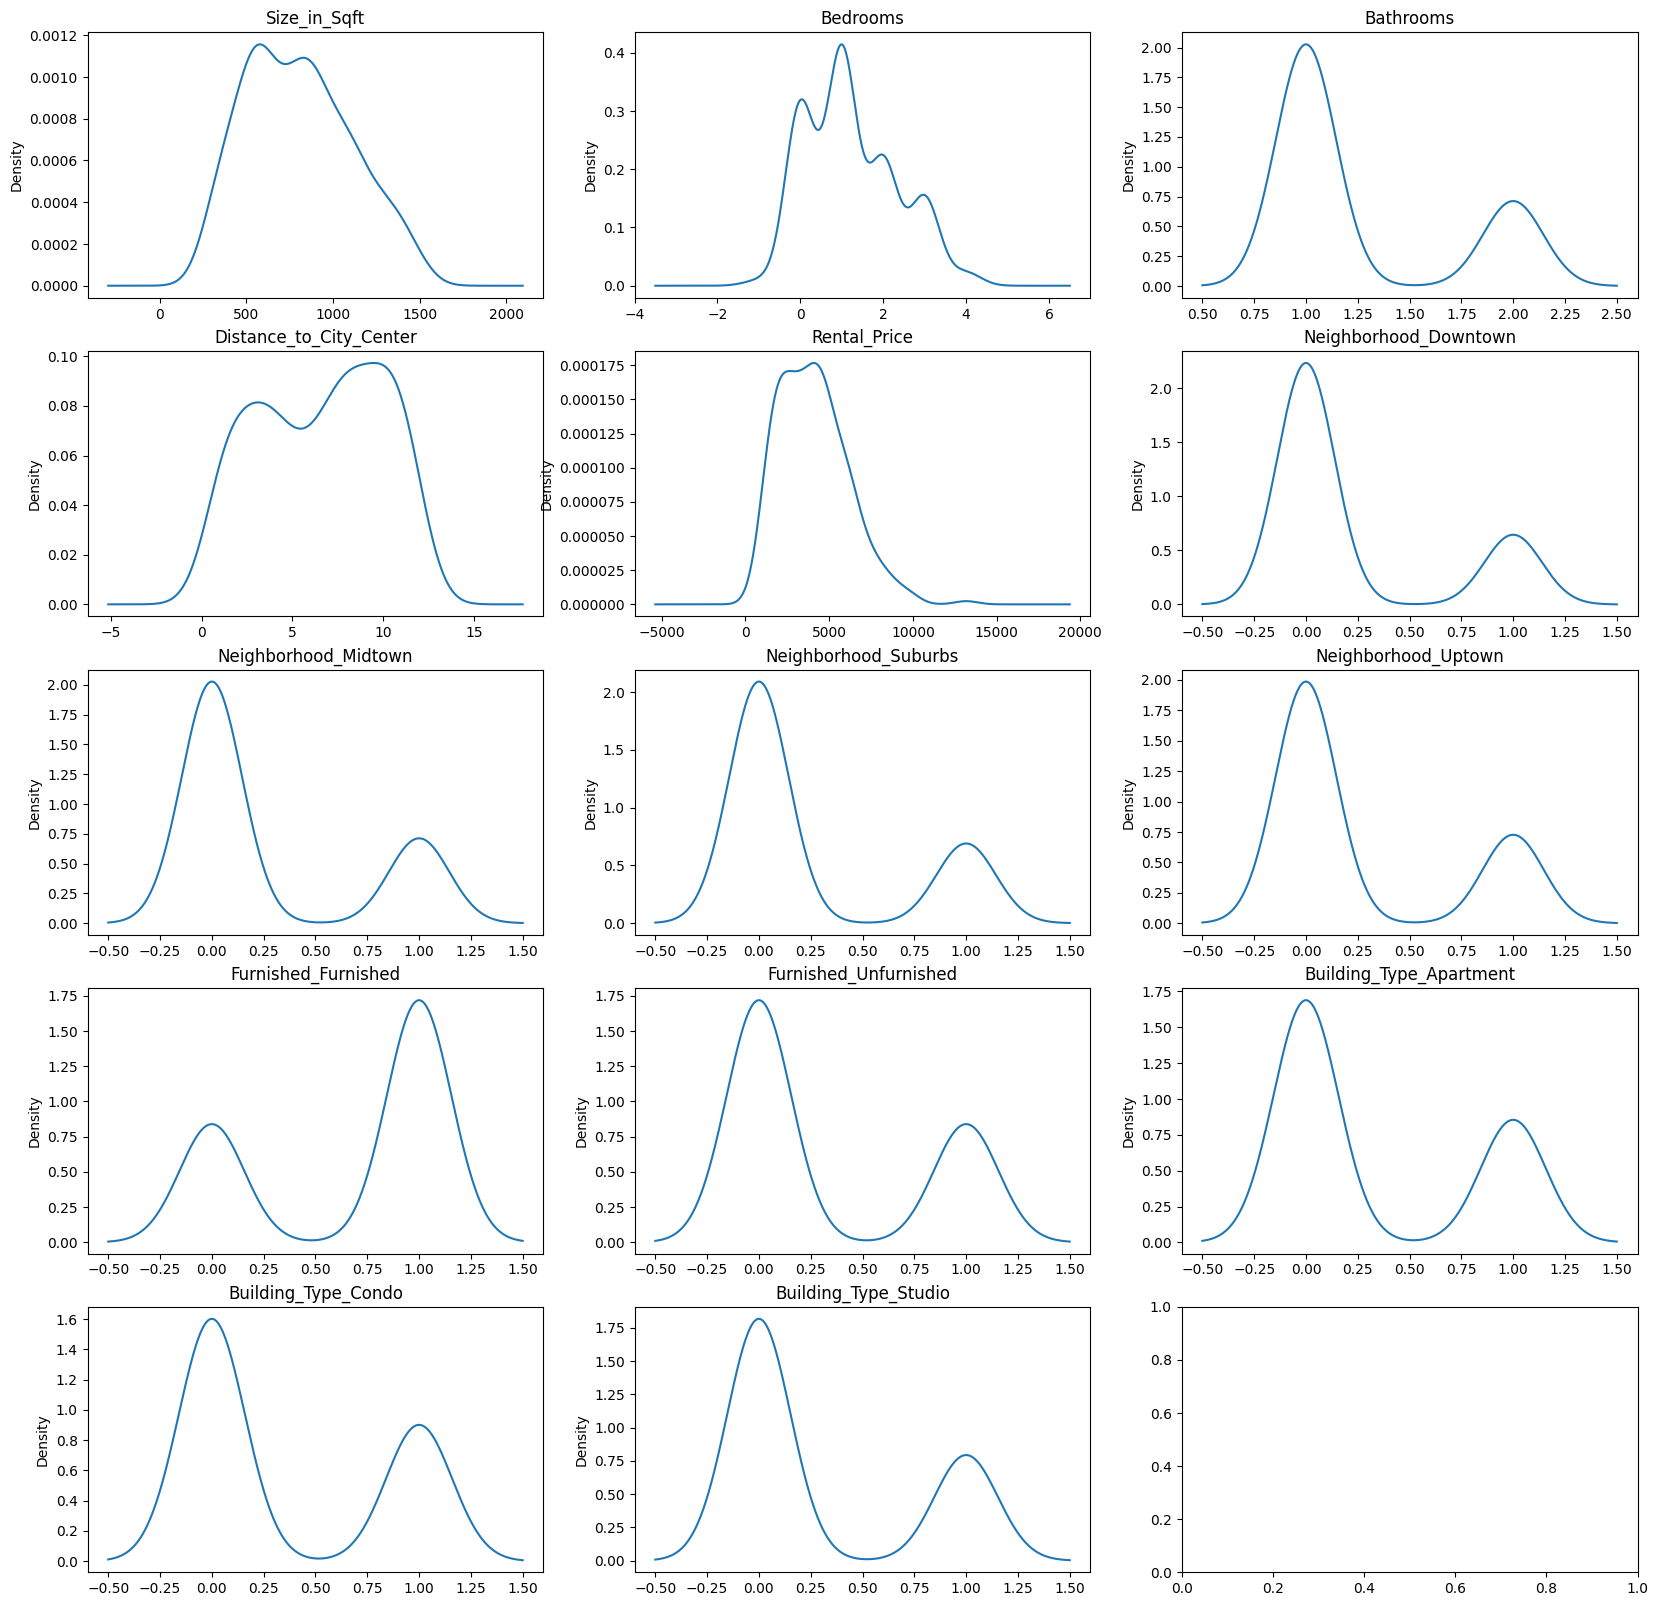

In [223]:
fig,ax = plt.subplots(5,3,figsize=(20,20))
row = col = 0
for n,i in enumerate(['Size_in_Sqft', 'Bedrooms', 'Bathrooms',
       'Distance_to_City_Center', 'Rental_Price', 'Neighborhood_Downtown',
       'Neighborhood_Midtown', 'Neighborhood_Suburbs', 'Neighborhood_Uptown',
       'Furnished_Furnished', 'Furnished_Unfurnished',
       'Building_Type_Apartment', 'Building_Type_Condo',
       'Building_Type_Studio']):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    new_df[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1

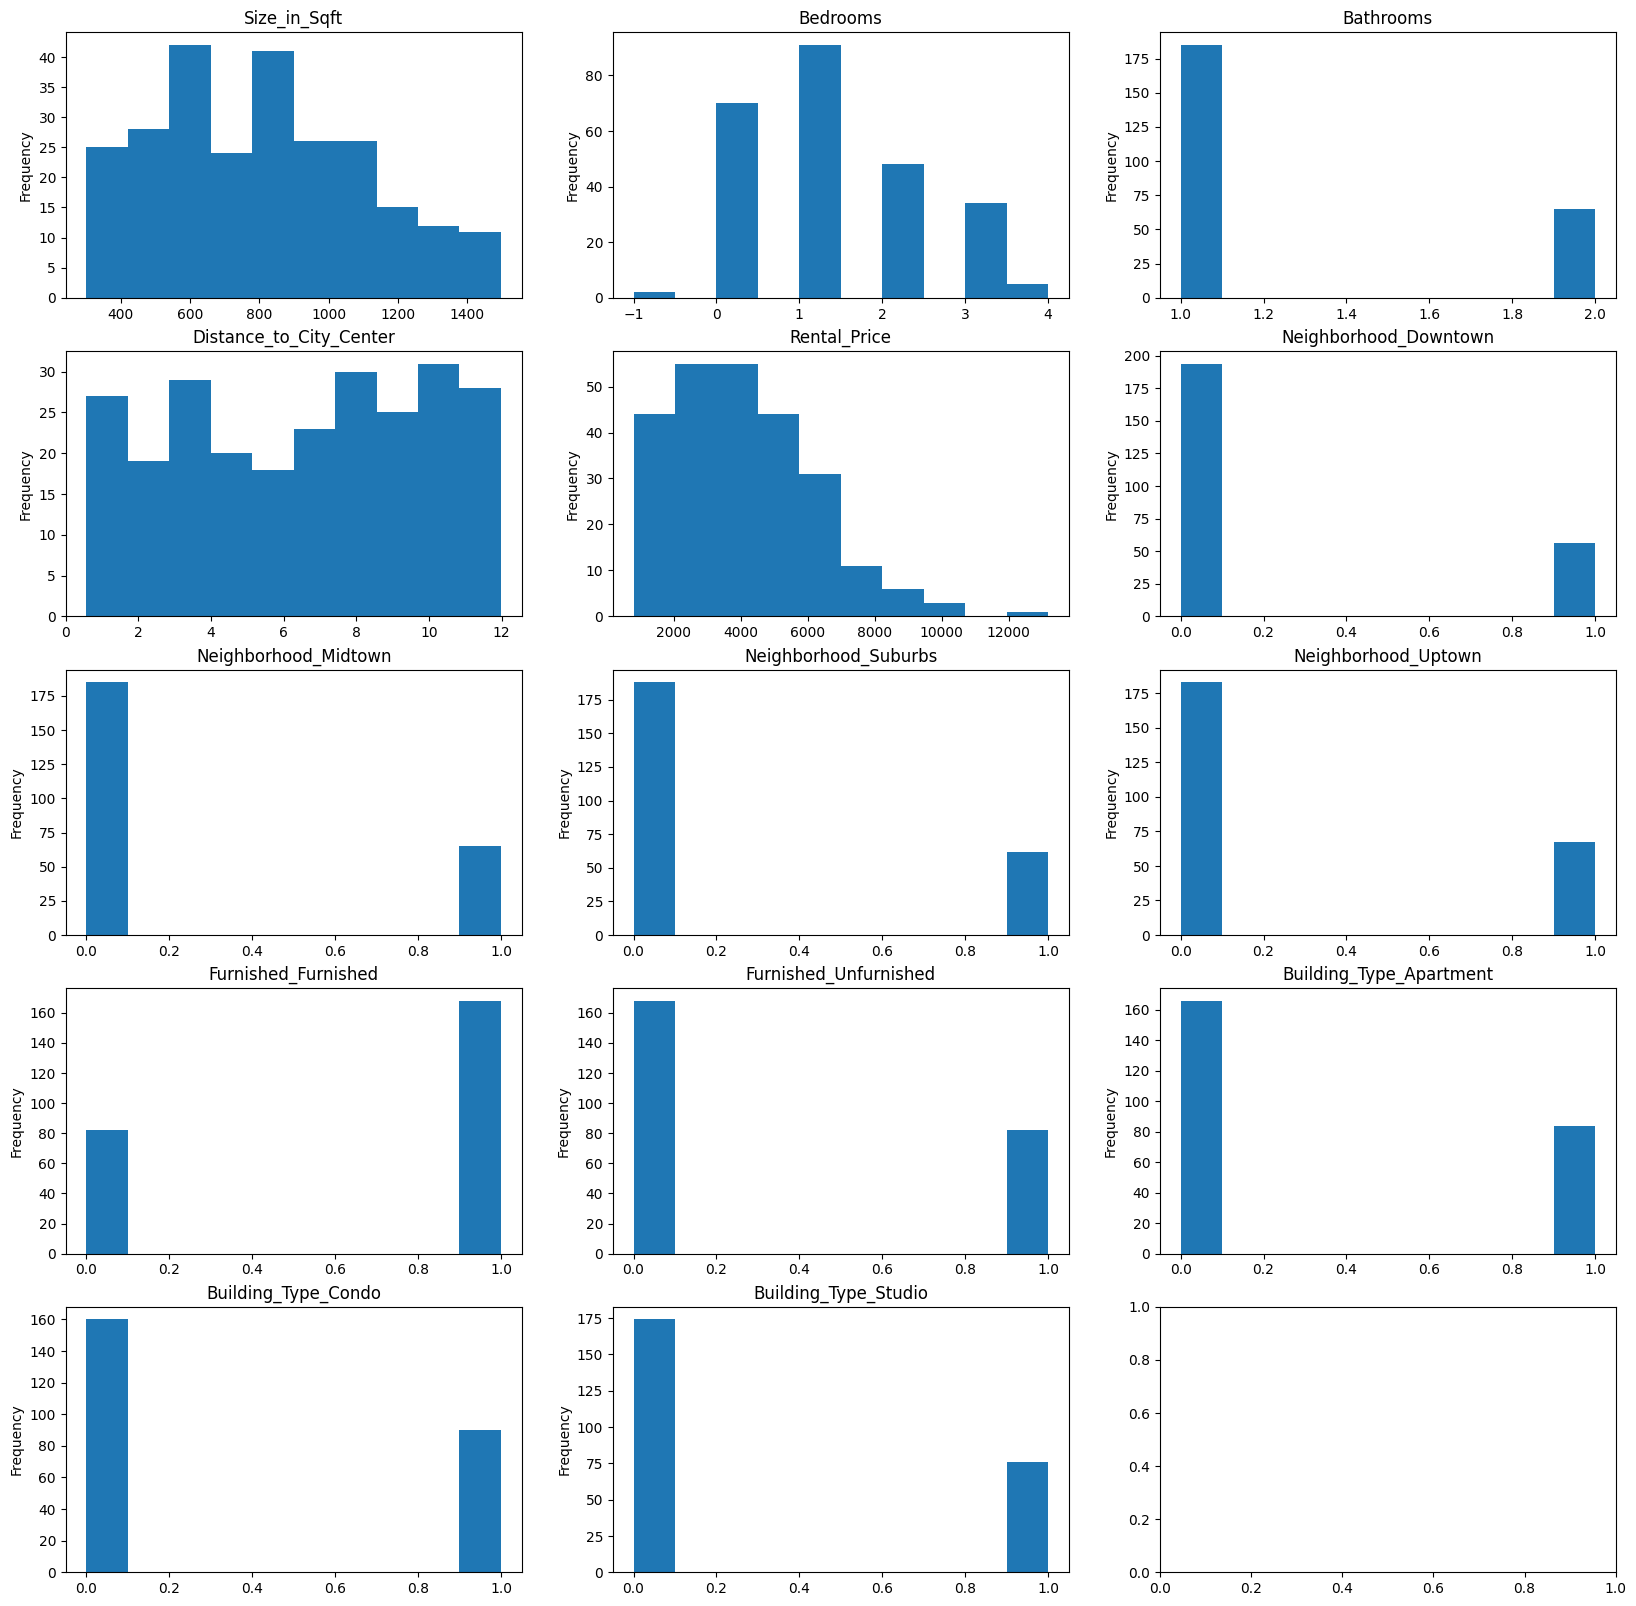

In [224]:
fig,ax = plt.subplots(5,3,figsize=(20,20))
row = col = 0
for n,i in enumerate(['Size_in_Sqft', 'Bedrooms', 'Bathrooms',
       'Distance_to_City_Center', 'Rental_Price', 'Neighborhood_Downtown',
       'Neighborhood_Midtown', 'Neighborhood_Suburbs', 'Neighborhood_Uptown',
       'Furnished_Furnished', 'Furnished_Unfurnished',
       'Building_Type_Apartment', 'Building_Type_Condo',
       'Building_Type_Studio']):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    new_df[i].plot(kind="hist",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1